# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/file/d/1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK/view. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('/Users/bene/Downloads/paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [3]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

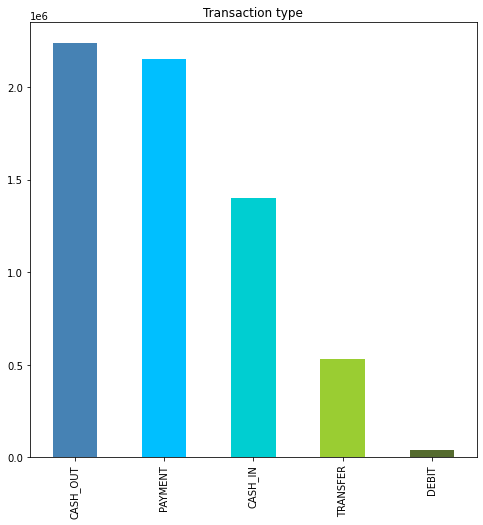

In [4]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color=['steelblue', 'deepskyblue', 'darkturquoise', 'yellowgreen', 'darkolivegreen'])
plt.show()

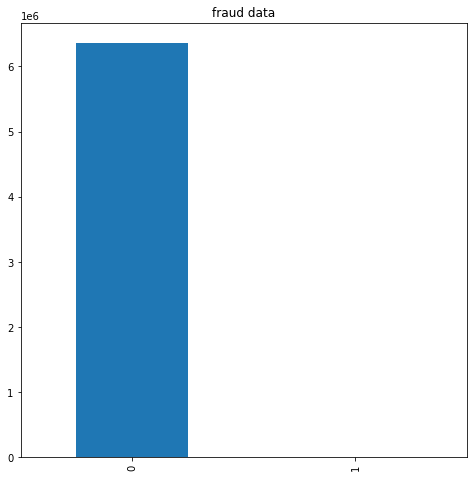

In [5]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [6]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

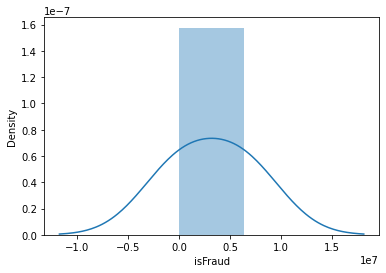

In [7]:
sns.distplot(data.isFraud.value_counts())


In [9]:
# imbalanced data

### What is the distribution of the outcome? 

In [44]:
# Your response here
# Right-skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [11]:
# Your code here


In [12]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [14]:
data.nameOrig.nunique()

6353307

In [15]:
data.nameDest.nunique()

2722362

In [16]:
(data.nameDest.nunique()/data.shape[0])*100


42.78680795018404

In [17]:
data.shape

(6362620, 11)

In [28]:
data.drop(columns=['nameOrig', 'nameDest'], inplace=True) 

In [29]:
from sklearn.preprocessing import LabelEncoder

label_ebcode = LabelEncoder()
data.type = label_ebcode.fit_transform(data.type)

In [30]:
data.dtypes

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [31]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

### Run a logisitc regression classifier and evaluate its accuracy.

In [32]:
# Your code here

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = data['isFraud']
x = data.drop(columns='isFraud')

In [33]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [34]:
#Now I can split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [35]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred))
print('f1_score: ', f1_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('ROC_AUC: ', roc_auc_score(y_test,y_pred))

Accuracy score:  0.999240878757493
Precision score:  0.9302631578947368
Confusion matrix:  [[1270851      53]
 [    913     707]]
f1_score:  0.5941176470588235
Recall score:  0.4364197530864197
ROC_AUC:  0.7181890252436625


### Now pick a model of your choice and evaluate its accuracy.

In [38]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1) # Taking all jobs possible
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)

In [39]:
print('Accuracy score: ', accuracy_score(y_test,y_pred2))
print('Precision score: ', precision_score(y_test,y_pred2))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred2))
print('f1_score: ', f1_score(y_test,y_pred2))
print('Recall score: ', recall_score(y_test,y_pred2))
print('ROC_AUC: ', roc_auc_score(y_test,y_pred2))

Accuracy score:  0.9997100251154398
Precision score:  0.9852598913886734
Confusion matrix:  [[1270885      19]
 [    350    1270]]
f1_score:  0.8731522860089378
Recall score:  0.7839506172839507
ROC_AUC:  0.891967833647798


### Which model worked better and how do you know?

In [42]:
# Your response here
# RFC

Let's use NearMiss method for undersampling and compare the results with previous

And now let's apply SMOTE

Apply your model on improved data

Calculate classification report for imbalanced data to evaluate the models

What is your conclusion?